# Bull Power (BULLP) 

https://www.linnsoft.com/techind/bull-power-bullp  

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01 00:00:00-04:00,49.782501,50.439999,49.327499,50.375000,48.208733,271742800
2018-08-02 00:00:00-04:00,50.145000,52.095001,50.087502,51.847500,49.617905,249616000
2018-08-03 00:00:00-04:00,51.757500,52.185001,51.369999,51.997501,49.761452,133789600
2018-08-06 00:00:00-04:00,52.000000,52.312500,51.767502,52.267502,50.019852,101701600
2018-08-07 00:00:00-04:00,52.330002,52.375000,51.689999,51.777500,49.550926,102349600


In [3]:
# Calculating the 13-day exponential moving average
df['ema_13'] = df['Adj Close'].ewm(span=13).mean()
# Calculating the 26-day exponential moving average    
df['ema_26'] = df['Adj Close'].ewm(span=26).mean()
# Calculating the Bull Power
df['bull_power'] = df['High'] - df['ema_26']

In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,ema_13,ema_26,bull_power
Date,,,,,,,,,
2018-08-01 00:00:00-04:00,49.782501,50.439999,49.327499,50.375000,48.208733,271742800,48.208733,48.208733,2.231266
2018-08-02 00:00:00-04:00,50.145000,52.095001,50.087502,51.847500,49.617905,249616000,48.967518,48.940418,3.154583
2018-08-03 00:00:00-04:00,51.757500,52.185001,51.369999,51.997501,49.761452,133789600,49.273839,49.235408,2.949594
2018-08-06 00:00:00-04:00,52.000000,52.312500,51.767502,52.267502,50.019852,101701600,49.505406,49.454704,2.857796
2018-08-07 00:00:00-04:00,52.330002,52.375000,51.689999,51.777500,49.550926,102349600,49.517508,49.477018,2.897982


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,ema_13,ema_26,bull_power
Date,,,,,,,,,
2018-12-24 00:00:00-05:00,37.037498,37.887501,36.647499,36.707500,35.375187,148676800,39.242709,41.545847,-3.658347
2018-12-26 00:00:00-05:00,37.075001,39.307499,36.680000,39.292500,37.866348,234330000,39.046086,41.273186,-1.965687
2018-12-27 00:00:00-05:00,38.959999,39.192501,37.517502,39.037498,37.620605,212468400,38.842446,41.002527,-1.810025
2018-12-28 00:00:00-05:00,39.375000,39.630001,38.637501,39.057499,37.639885,169165600,38.670651,40.753359,-1.123358
2018-12-31 00:00:00-05:00,39.632500,39.840000,39.119999,39.435001,38.003689,140014000,38.575371,40.549616,-0.709616


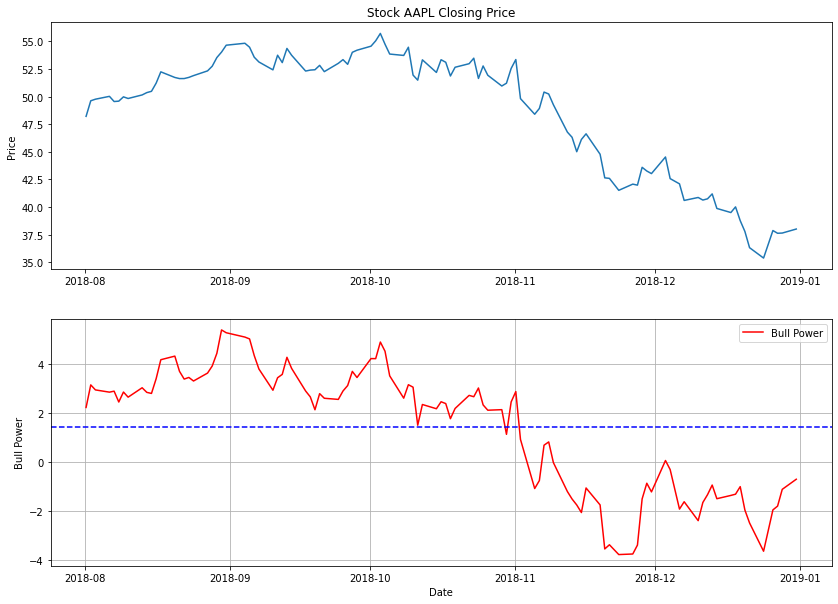

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['bull_power'], label='Bull Power', color='red')
ax2.axhline(y=df['bull_power'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Bull Power')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with Bull Power

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ema_13,ema_26,bull_power,VolumePositive
0,736907.166667,49.782501,50.439999,49.327499,50.375000,48.208733,271742800,48.208733,48.208733,2.231266,False
1,736908.166667,50.145000,52.095001,50.087502,51.847500,49.617905,249616000,48.967518,48.940418,3.154583,False
2,736909.166667,51.757500,52.185001,51.369999,51.997501,49.761452,133789600,49.273839,49.235408,2.949594,False
3,736912.166667,52.000000,52.312500,51.767502,52.267502,50.019852,101701600,49.505406,49.454704,2.857796,False
4,736913.166667,52.330002,52.375000,51.689999,51.777500,49.550926,102349600,49.517508,49.477018,2.897982,False


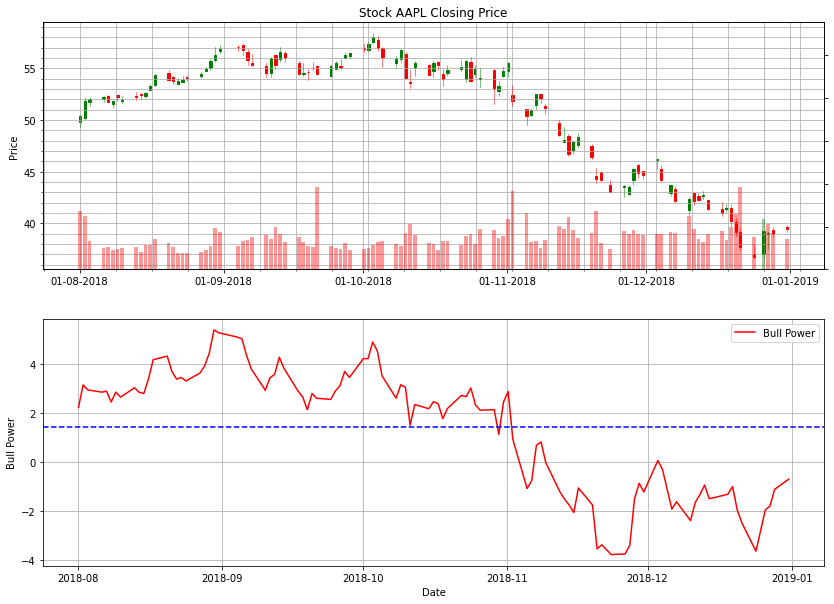

In [8]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['bull_power'], label='Bull Power', color='red')
ax2.axhline(y=df['bull_power'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Bull Power')
ax2.set_xlabel('Date')
ax2.legend(loc='best')